<a href="https://colab.research.google.com/github/santoshnayakgithub/Exploratory-Data-Analysis/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
% matpllotlib inline

UsageError: Line magic function `%matpllotlib` not found.


In [11]:
#for uploading dataset into google colab
from google.colab import files
uploaded = files.upload()

Saving Admission_Prediction.csv to Admission_Prediction.csv


In [0]:
#load csv data into dataframe
df= pd.read_csv('Admission_Prediction.csv')

In [13]:
#dataframe info deatils
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [14]:
#top 5 data of dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [15]:
#Missing value sum count
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [0]:
#Fill na rows all 3 columns
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'] .fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [0]:
#drop columns which is not required for analysis
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
#make y as output predictor variable
y=df['Chance of Admit']
columns=x.columns

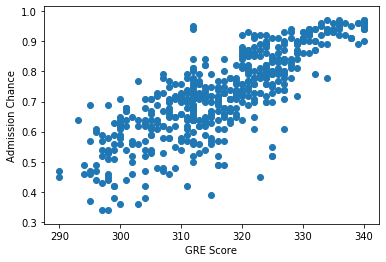

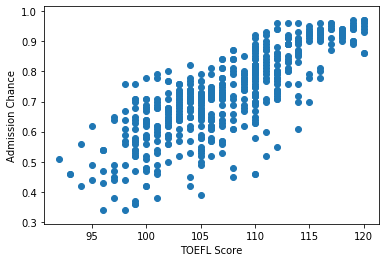

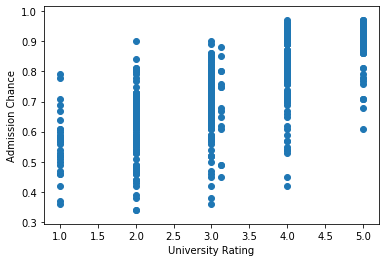

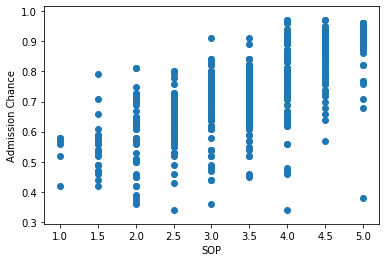

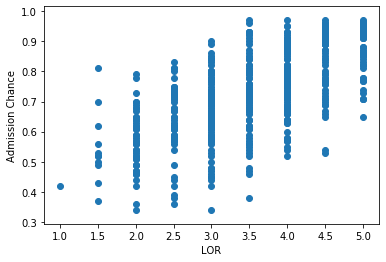

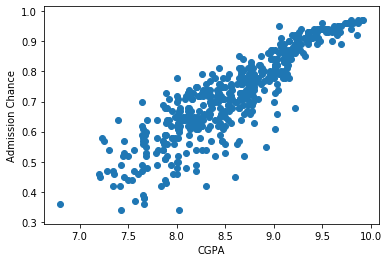

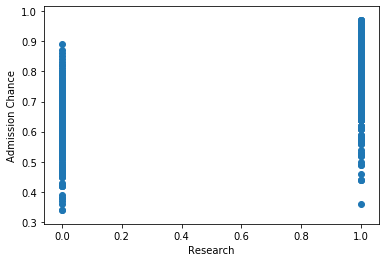

In [18]:
#scatter plot for visualization
for col in x.columns:
  if(col!=['Chance of Admit']):
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel('Admission Chance')
    plt.show()

In [0]:
#scale datas into a standard form
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaled_data=scaler_feature.fit_transform(x)

In [0]:
# import train test split from sklearn module
from sklearn.model_selection import train_test_split

In [37]:
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [0]:
#split data into train and test with 70-30 ratio
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30, random_state=33)

In [26]:
#import linear model and linear regression from sklearn package
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#import rsqare from sklearn for evaluating error
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)
score

0.8064175338455487

In [0]:
#import pickle for data serilization
import pickle

In [0]:
#save file in pickle format
filename='finalised.model.pickle'
pickle.dump(reg,open(filename,'wb'))

In [30]:
#test model by giving requird input
a=reg.predict(([[320,110,5,5,5,10,1]]))
a

array([0.9651199])

In [31]:
reg.coef_

array([ 0.00154687,  0.00295013,  0.0091756 , -0.00462642,  0.01894362,
        0.12797262,  0.02700249])

In [32]:
reg.intercept_

-1.278586811672625

In [33]:
a=scaler_feature.transform([[300,100,5,5,5,10,1]])
a

array([[-1.47678951, -1.19575626,  1.66568791,  1.64240413,  1.63976333,
         2.35607728,  0.88640526]])

In [34]:
reg.predict(a)

array([-0.92020205])